<a href="https://colab.research.google.com/github/dhruvk98/Machine-Learning-Projects/blob/master/imdb_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Scraping IMDb for Reviews


**Scrapy vs BeautifulSoup**

- Scrapy is used for more powerful datasets and we can use BeautifulSoup for simple ones

- Scrapy is more advanced and has a steeper learning curve whereas BeatifulSoup can be used by beginners also

- Scrapy is a complete package while BeautifulSoup requires other libraries such as urlib2 and requests

Link for this comparison: https://www.datacamp.com/community/tutorials/making-web-crawlers-scrapy-python



---



Extract reviews using BeautifulSoup from **IMDb** pages

BeautifulSoup4 tutorial: https://www.dataquest.io/blog/web-scraping-beautifulsoup/


**List of Indian TV Shows on Netflix**
1. Sacred Games
2. Little Things
3. Jamtara: Sabka Number Aayega
4. Bard of Blood
5. Leila

**List of Indian TV Shows on Amazon Prime**
1. Mirzapur
2. Made in Heaven
3. Inside Edge
4. Panchayat
5. The Family Man





In [0]:
pip install bs4

In [0]:
pip install selenium

     |████████████████████████████████| 911kB 2.8MB/s 


In [5]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from bs4 import BeautifulSoup as bs
from requests import get

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Lists to be used in our dataframe
show_name = []
username = []
review_date = []
review_title = []
review = []

In [0]:
# from selenium import webdriver 
# from selenium.webdriver.common.keys import Keys 
# from selenium.webdriver.support.ui import WebDriverWait 
# from selenium.webdriver.support import expected_conditions as EC 
# from selenium.webdriver.common.by import By 
# from selenium.common.exceptions import NoSuchElementException 
# import time
# import os

# code to get selenium to work in google colab
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',options=chrome_options)
wd.get("https://www.webite-url.com")

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [911 kB]
Get:14 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main Sour

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: use options instead of chrome_options


In [0]:
# function to scrape IMDb and get required data

def get_review(url):
  driver = webdriver.Chrome('chromedriver',options=chrome_options) 
  driver.get(url)
  while True:
      try:
          loadmore = driver.find_element_by_id("load-more-trigger")
          time.sleep(1)
          loadmore.click()
          time.sleep(1)
      except Exception as e:
          print(e)
          break
      print("Complete")
      time.sleep(3)
      print("Extracting data...")
    
      response = get(url)

      bs4object = bs(response.text, features='html.parser')

      # container which has all usernames
      user = bs4object.find_all('span', attrs={'class':'display-name-link'})

      # container which has all review dates
      review_dates = bs4object.find_all('span', attrs={'class':'review-date'})

      # container which has all review titles
      review_titles = bs4object.find_all('a', attrs={'class':'title'})

      # container which has all reviews
      review_tags = bs4object.find_all('div', attrs={'class':'text show-more__control'})  

      # name of TV show
      name = bs4object.find('meta', property='og:title')
      print(name)

      for i in range(0,len(user)):
        username.append(user[i].text)
        review_date.append(review_dates[i].text)
        review_title.append(review_titles[i].text)
        review.append(review_tags[i].text)
        show_name.append(name['content'])
    
  driver.quit()


In [0]:
url_list = ['https://www.imdb.com/title/tt6077448/reviews?ref_=tt_urv' # sacred games
            'https://www.imdb.com/title/tt6522580/reviews?ref_=tt_urv', # little things
            'https://www.imdb.com/title/tt8069036/reviews?ref_=tt_urv', # bard of blood
            'https://www.imdb.com/title/tt9337588/reviews?ref_=tt_urv', # leila
            'https://www.imdb.com/title/tt11150912/reviews?ref_=tt_urv', # jamtara: sabka number aayega
            'https://www.imdb.com/title/tt6473300/reviews?ref_=tt_urv', # mirzapur
            'https://www.imdb.com/title/tt9544034/reviews?ref_=tt_urv', # the family man
            'https://www.imdb.com/title/tt6112414/reviews?ref_=tt_urv', # inside edge
            'https://www.imdb.com/title/tt6494622/reviews?ref_=tt_urv', # made in heaven
            'https://www.imdb.com/title/tt12004706/reviews?ref_=tt_urv' # panchayat

]

In [0]:
for u in url_list:
  get_review(u)

Complete
Extracting data...
<meta content="Sacred Games (TV Series 2018– ) - IMDb" property="og:title"/>
Complete
Extracting data...
<meta content="Sacred Games (TV Series 2018– ) - IMDb" property="og:title"/>
Complete
Extracting data...
<meta content="Sacred Games (TV Series 2018– ) - IMDb" property="og:title"/>
Complete
Extracting data...
<meta content="Sacred Games (TV Series 2018– ) - IMDb" property="og:title"/>
Complete
Extracting data...
<meta content="Sacred Games (TV Series 2018– ) - IMDb" property="og:title"/>
Complete
Extracting data...
<meta content="Sacred Games (TV Series 2018– ) - IMDb" property="og:title"/>
Complete
Extracting data...
<meta content="Sacred Games (TV Series 2018– ) - IMDb" property="og:title"/>
Complete
Extracting data...
<meta content="Sacred Games (TV Series 2018– ) - IMDb" property="og:title"/>
Complete
Extracting data...
<meta content="Sacred Games (TV Series 2018– ) - IMDb" property="og:title"/>
Complete
Extracting data...
<meta content="Sacred Games

In [0]:
# creating dataframe of our reviews
df = pd.DataFrame({
    'show':show_name,
    'username':username,
    'date':review_date,
    'title':review_title,
    'review':review
})

In [0]:
df.shape

(3825, 5)

In [0]:
df.head()

,show,username,date,title,review
0,Sacred Games (TV Series 2018– ) - IMDb,muamorris,13 July 2018,Season 2\n,Not an Indian but am completely hooked. Better...
1,Sacred Games (TV Series 2018– ) - IMDb,shubhamtyagi-10119,7 July 2018,This show talks about revolution. Literally. ...,This is first Indian netflix original series d...
2,Sacred Games (TV Series 2018– ) - IMDb,avhirupjazz,7 July 2018,Don't watch it if you have your exam next day!\n,"With a solid start to the drama,with every epi..."
3,Sacred Games (TV Series 2018– ) - IMDb,nina_fairfax,22 July 2018,Watch it - and put a little effort into watch...,"First of all, if you're not from India, please..."
4,Sacred Games (TV Series 2018– ) - IMDb,pratibhbist,7 July 2018,This could be the turning point in TV in INDI...,"First of all, hats off Anurag Kashyap and Vikr..."


In [0]:
df.tail()

,show,username,date,title,review
3820,Panchayat (TV Series 2020– ) - IMDb,prithwisarkar,4 April 2020,Tvf again proved it\n,The content and acting is so powerful you will...
3821,Panchayat (TV Series 2020– ) - IMDb,adadhwal,4 April 2020,Awesome\n,One word just awesome!!! This is what I expect...
3822,Panchayat (TV Series 2020– ) - IMDb,playerankit,5 April 2020,Sweet simple funny\n,"It's quarentine time here, I was sitting brows..."
3823,Panchayat (TV Series 2020– ) - IMDb,debdeepshit,4 April 2020,Very positive\n,Its makes you positive..such a great story..fe...
3824,Panchayat (TV Series 2020– ) - IMDb,ankit_cs14,3 April 2020,Amazing series superb cast and the background...,I'll just start with.. it's an amazing series ...


In [0]:
from google.colab import files
df.to_csv('indian_shows.csv')
files.download('indian_shows.csv')

# Part 2: Natural Language Processing Using PyCaret

PyCaret is an open source *low-code* machine learning library. 
For more details visit: https://pycaret.org/


In [0]:
!pip install pycaret

In [3]:
# to display interactive visuals 
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


In [6]:
# uploaded indian_shows.csv to colab environment 
df = pd.read_csv('indian_shows.csv')

In [7]:
df.head()

,Unnamed: 0,show,username,date,title,review
0,0,Sacred Games (TV Series 2018– ) - IMDb,muamorris,13 July 2018,Season 2\n,Not an Indian but am completely hooked. Better...
1,1,Sacred Games (TV Series 2018– ) - IMDb,shubhamtyagi-10119,7 July 2018,This show talks about revolution. Literally. ...,This is first Indian netflix original series d...
2,2,Sacred Games (TV Series 2018– ) - IMDb,avhirupjazz,7 July 2018,Don't watch it if you have your exam next day!\n,"With a solid start to the drama,with every epi..."
3,3,Sacred Games (TV Series 2018– ) - IMDb,nina_fairfax,22 July 2018,Watch it - and put a little effort into watch...,"First of all, if you're not from India, please..."
4,4,Sacred Games (TV Series 2018– ) - IMDb,pratibhbist,7 July 2018,This could be the turning point in TV in INDI...,"First of all, hats off Anurag Kashyap and Vikr..."


In [20]:
# import nlp module
from pycaret.nlp import *

exp_nlp = setup(data=df,target='review')

Description,Value
session_id,4952
# Documents,3825
Vocab Size,1826
Custom Stopwords,False


In [21]:
# create a model
# lda = create_model(model='lda',num_topics=5)
hdp = create_model(model='hdp',num_topics=5)

In [0]:
# This function returns data frame with topic weights, 
# dominant topic and % of the dominant topic (where applicable)
# lda_df = assign_model(lda)
hdp_df = assign_model(hdp)

In [23]:
hdp_df.head()

,Unnamed: 0,show,username,date,title,review,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Dominant_Topic
0,0,Sacred Games (TV Series 2018– ) - IMDb,muamorris,13 July 2018,Season 2\n,completely hook better watch indian great stor...,0.499809,0.058367,0.0,0.429022,0.0,Topic 0
1,1,Sacred Games (TV Series 2018– ) - IMDb,shubhamtyagi-10119,7 July 2018,This show talks about revolution. Literally. ...,indian direct second season bigger_disappointm...,0.187692,0.807281,0.0,0.000000,0.0,Topic 1
2,2,Sacred Games (TV Series 2018– ) - IMDb,avhirupjazz,7 July 2018,Don't watch it if you have your exam next day!\n,solid start drama episode make heart_beat_fast...,0.982270,0.000000,0.0,0.000000,0.0,Topic 0
3,3,Sacred Games (TV Series 2018– ) - IMDb,nina_fairfax,22 July 2018,Watch it - and put a little effort into watch...,watch fine_unfamiliar_tones_language speak add...,0.992757,0.000000,0.0,0.000000,0.0,Topic 0
4,4,Sacred Games (TV Series 2018– ) - IMDb,pratibhbist,7 July 2018,This could be the turning point in TV in INDI...,manage put together amazing feat say direct sh...,0.693027,0.000000,0.0,0.289598,0.0,Topic 0


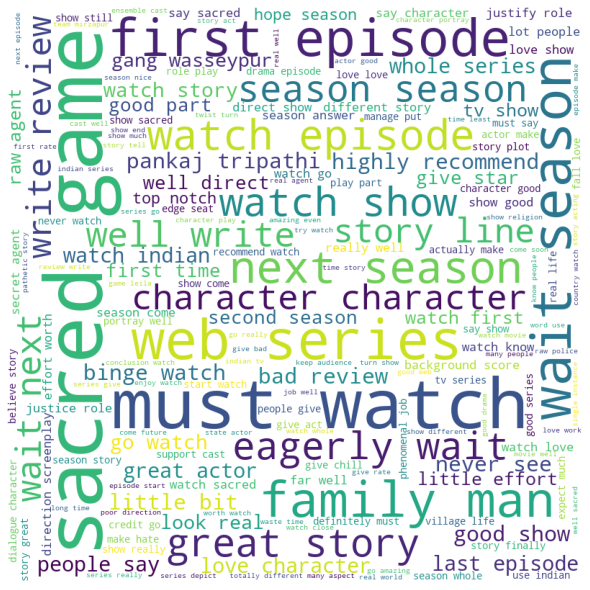

In [26]:
# various plots according to a topic
# plot_model(model=lda,plot='sentiment',topic_num=0)
plot_model(model=hdp,plot='wordcloud')

In [0]:
# following functions provides interactive plots for our model topic wise
# only works on Google Colab and uses plot_model internally
# evaluate_model(hdp)